In [9]:
def plot_grid(narr):
    '''Plots 2d lattice with vertices colored in black and red according to given mask.
    Vertice is colored black if narr[i, j] == True and red otherwise.
    
    Parameters
    ----------
    narr : 2d boolean ndarray
        Mask for vertices colors
    '''

    if narr.dtype != 'bool':
        raise ValueError('narr should be a boolean ndarray')
    colors = np.empty(narr.shape, dtype='U5')
    colors[:] = 'red'
    colors[narr] = 'black'
    x, y = np.indices((narr.shape))
    plt.scatter(x, y, c=colors.ravel())
    plt.show()

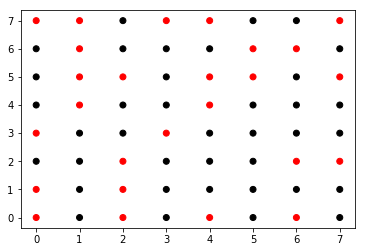

In [8]:
size = 8
narr = np.random.choice([0, 1], size=size**2).reshape((size, size)).astype('bool')

plot_grid(narr)

In [125]:
#напишем функцию мсмс, новое состояние цепи - это граф, который отличается от предыдущего только одной закрашенной вершиной
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    '''Generic Metropolis scheme.
    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density (unnormalized) at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post=[0]
    for s in range(niter):
        j,i=np.random.choice(8,2)
        proposed = proposal(current)
        p = value(current, **kwargs) / value(proposed, **kwargs)
        if np.random.rand() > p:
            current = proposed
        else:
            current[j][i]=0
        post.append(int(np.sum(current)))
    plot_grid(current.astype('bool'))
    return post[nburn:]

In [124]:
#сравнивать будем по количеству закрашенных вершин
def value(curr, **kwargs):
    _ = kwargs
    return curr.sum()

In [123]:
#выбор нового состояния цепи (выбор и закраска вершины)
def proposal(curr, **kwargs):
    j,i=np.random.choice(8,2)
    _ = kwargs
    s=0
    if(curr[j][i]==1):
        return curr
    
    if(j!=0):
        s+=curr[j-1][i]
    
    if(i!=0):
        s+=curr[j][i-1]
    
    if(j!=7):
        s+=curr[j+1][i]
    
    if(i!=7):
        s+=curr[j][i+1]
    
    if(s==0):
        curr[j][i]=1
   
    return curr
    
    
    


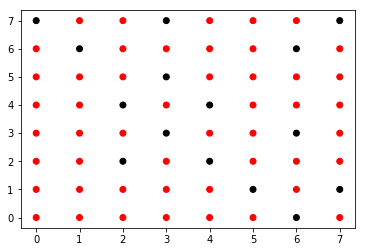

Cреднее число закрашенных вершин в графе с правильной конфигурацией:
15.2839871601284


In [121]:
import numpy as np
import matplotlib.pyplot as plt
start=np.zeros((8,8))
niter=100000
A=metroplis(start, value, proposal, niter, nburn=0)
print('Cреднее число закрашенных вершин в графе с правильной конфигурацией:')
print(sum(A)/len(A))


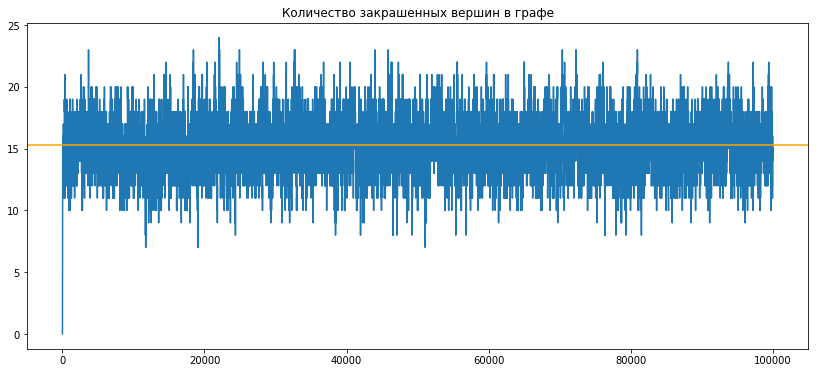

Ttest_indResult(statistic=8.32914937704761, pvalue=1.870330009554748e-16)

In [142]:
#посмотрим на стационарность
from scipy import stats
plt.figure(figsize=(14,6))
plt.plot(A)
plt.axhline(sum(A)/len(A),c='orange')
plt.title("Количество закрашенных вершин в графе")
plt.show()
def g_test(x, start=0.1, end=0.1):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)
g_test(post[2010:10000])

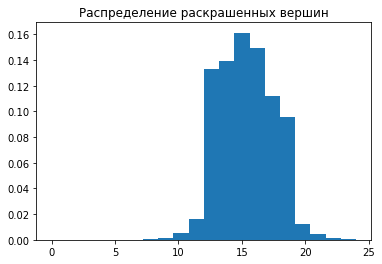

In [143]:
#построим распределение 
plt.hist(A,density='true',bins=20)
plt.title("Распределение раскрашенных вершин")
plt.show()